# 1. Import libraries to be used in this notebook

In [1]:
import numpy as np # for array manipulation and basic scientific calculation
import xarray as xr # To read NetCDF files
import matplotlib.pyplot as plt # Core library for plotting
from functions.Calc_Emis import Calc_Emis_T # Emission calculation

# 2. Read files

## 2.1. Model output

In [2]:
Filebase_CONUS = '/glade/scratch/tilmes/archive/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/hist/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h1.2013-MM.nc'

# Change "MM" to 01~12 for a year calculation
Files_CONUS = [] # empty list for a start
# file list with 12 files
for mm in np.arange(12):
    Files_CONUS.append( Filebase_CONUS.replace('MM',str(mm+1).zfill(2)) )
# read 12 files at once using "mf"dataset
ds_CONUS = xr.open_mfdataset( Files_CONUS ) 


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  if __name__ == '__main__':
/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


## 2.2. SCRIP file
### SCRIP file has grid information that is needed to calculate area of each grid
### Don't have to read, just locate where the files are

In [3]:
SCRIP_CONUS = '/glade/p/acom/MUSICA/grids/ne0CONUSne30x8/ne0CONUS_ne30x8_np4_SCRIP.nc'

# 3. Calculate emissions for 12 months

In [4]:
# Calculate CO emissions - global
CO_Emis_global = Calc_Emis_T( ds_CONUS['SFCO'], print_results=False, 
                              mw=28., scrip_file=SCRIP_CONUS )
# Calculate CO emissions - specify longitudes and latitudes
CO_Emis_CONUS = Calc_Emis_T( ds_CONUS['SFCO'], print_results=False, 
                             mw=28., scrip_file=SCRIP_CONUS, 
                             lon_range=[-130,-60], lat_range=[20,55] )


# 4. Draw a simple plot

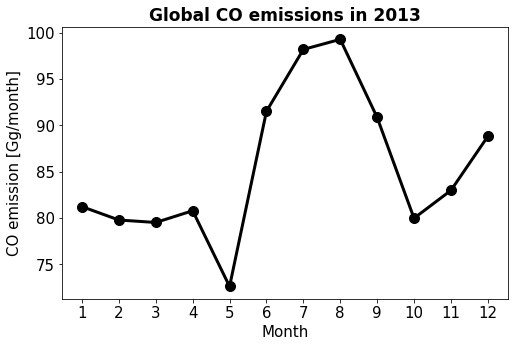

In [5]:
fig = plt.figure( figsize=(8,5) )
ax = fig.add_subplot(1,1,1)

# Plot global monthly CO emissions
ax.plot( np.arange(12)+1, CO_Emis_global.emissions_total/1E9, 'ko-', lw=3, ms=10 )

# === Polish the plot === 
# Font size
xticks = ax.set_xticks( np.arange(12)+1 )
xticklabels = plt.setp( ax.get_xticklabels(), fontsize=15 )
yticklabels = plt.setp( ax.get_yticklabels(), fontsize=15 )
# Add x & y axis titles
xlabel = ax.set_xlabel( 'Month', fontsize=15 )
ylabel = ax.set_ylabel( 'CO emission [Gg/month]', fontsize=15 )
# Add plot title
title = ax.set_title( 'Global CO emissions in 2013', fontsize=17, weight='semibold' )

